# 20 News Group - Text Classification 

In [1]:
from fastai import *
from fastai.text import * 

In [2]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [15]:
df = pd.DataFrame({'label':dataset.target, 'text':dataset.data})
df.shape

(11314, 2)

In [16]:
df.head()

,label,text
0,17,Well i'm not sure about the story nad it did s...
1,0,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,17,Although I realize that principle is not one o...
3,11,Notwithstanding all the legitimate fuss about ...
4,10,"Well, I will have to change the scoring on my ..."


In [17]:
df['label'].value_counts()

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: label, dtype: int64

We’ll convert this into a binary classification problem by selecting only 2 out of the 20 labels present in the dataset. We will select labels 1 and 10 which correspond to ‘comp.graphics’ and ‘rec.sport.hockey’, respectively.

In [18]:
df = df[df['label'].isin([1,10])]
df = df.reset_index(drop = True)

In [19]:
df.head()

,label,text
0,10,"Well, I will have to change the scoring on my ..."
1,1,Archive-name: graphics/resources-list/part1\nL...
2,10,"\nAnd of course, Mike Ramsey was (at one time)..."
3,10,"As I promised, I would give you the name of th..."
4,10,GAME(S) OF 4/15\n---------------\nADIRONDACK 6...


In [20]:
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

In [22]:
df['text'][4]

"GAME(S) OF 4/15\n---------------\nADIRONDACK 6\tCDI 2\t(Adirondack leads series, 1-0)\n\n=================================================\t\t\t\nFIRST ROUND\t\t\t\t\t\nSpringfield Indians vs Providence Bruins\nGm 1:\tSpringfield 3\tPROVIDENCE 2\t\nGm 2:\tSpringfield 5\tPROVIDENCE 4\nGm 3:\t4/16\tProvidence at Springfield\nGm 4:\t4/17\tProvidence at Springfield\nGm 5:\t4/22\tSpringfield at Providence\t*\nGm 6:\t4/24\tProvidence at Springfield\t*\nGm 7:\t4/27\tSpringfield at Providence\t*\n\nCD Islanders vs Adirondack Red Wings\nGm 1:\tADIRONDACK 6\tCDI 2\nGm 2:\t4/17\tCDI at Adirondack\nGm 3:\t4/18\tAdirondack at CDI\nGm 4:\t4/21\tAdirondack at CDI\nGm 5:\t4/23\tCDI at Adirondack\t*\nGm 6:\t4/24\tAdirondack at CDI\t*\nGm 7:\t4/26\tCDI at Adirondack\t*\n\nBaltimore Skipjacks at Binghamton Rangers\nGm 1:\t4/16\tBaltimore at Binghamton\nGm 2:\t4/17\tBaltimore at Binghamton\nGm 3:\t4/23\tBinghamton at Baltimore\nGm 4:\t4/24\tBinghamton at Baltimore\nGm 5:\t4/26\tBaltimore at Binghamton\t*

## Pre-processing

 It’s always a good practice to feed clean data to your models, especially when the data comes in the form of unstructured text. Let’s clean our text by retaining only alphabets and removing everything else.

In [23]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")   # replace non-alphabets with empty string

In [24]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [25]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['text'] = detokenized_doc

In [26]:
df['text'][4]

'GAME S OF ADIRONDACK CDI Adirondack leads series FIRST ROUND Springfield Indians vs Providence Bruins Gm Springfield PROVIDENCE Gm Springfield PROVIDENCE Gm Providence Springfield Gm Providence Springfield Gm Springfield Providence Gm Providence Springfield Gm Springfield Providence CD Islanders vs Adirondack Red Wings Gm ADIRONDACK CDI Gm CDI Adirondack Gm Adirondack CDI Gm Adirondack CDI Gm CDI Adirondack Gm Adirondack CDI Gm CDI Adirondack Baltimore Skipjacks Binghamton Rangers Gm Baltimore Binghamton Gm Baltimore Binghamton Gm Binghamton Baltimore Gm Binghamton Baltimore Gm Baltimore Binghamton Gm Binghmaton Baltimore Gm Baltimore Binghamton Utica Devils vs Rochester Americans Gm Utica Rochester Gm Utica Rochester Gm Rochester Utica Gm Rochester Utica Gm Utica Rochester Gm Rochester Utica Gm Utica Rochester Moncton Hawks vs St John Maple Leafs Gm St John Moncton Gm Moncton vs St John Halifax Gm St John Moncton Gm St John Moncton Gm Moncton vs St John Halifax Gm St John Moncton Gm 

Now let’s split our cleaned dataset into training and validation sets

In [27]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.4, random_state = 12)
df_trn.shape, df_val.shape

((710, 2), (474, 2))

### Fastai DataBunch

In [31]:
# language model data using Fastai library
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

## Training

### Fine-Tune the Pre-Trained Language Model

In [29]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


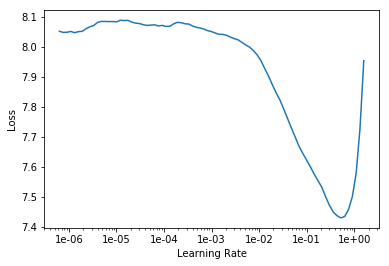

In [35]:
learn.recorder.plot(skip_end=9)

In [36]:
# train the learner object with learning rate = 4e-2
learn.fit_one_cycle(1, 4e-2)

Total time: 00:02
epoch  train_loss  valid_loss  accuracy
1      7.069874    6.091651    0.174120  (00:02)



In [37]:
learn.save_encoder('ft_enc')

Use the data_clas object to build a classifier with our fine-tuned encoder

In [38]:
bs = 32   # do small batchsize since the dataset is small

In [39]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=bs)

In [50]:
learn = text_classifier_learner(data_clas, drop_mult=0.7)
learn.load_encoder('ft_enc')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


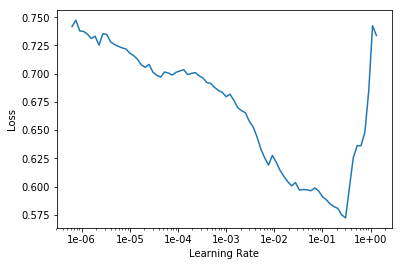

In [51]:
learn.lr_find()
learn.recorder.plot()

### This is just for comparison 
learn.fit_one_cycle(12, 1e-2)

epoch  train_loss  valid_loss  accuracy

1      0.512444    0.212690    0.949367  (00:08)

2      0.469201    0.221738    0.915612  (00:08)

3      0.453225    0.270365    0.934599  (00:08)

4      0.448653    0.231459    0.936709  (00:08)

5      0.440426    0.287306    0.932489  (00:08)

6      0.440595    0.303788    0.860759  (00:08)

7      0.460635    0.264652    0.934599  (00:08)

8      0.474176    0.236547    0.913502  (00:08)

9      0.424343    0.215563    0.938819  (00:08)

10     0.400122    0.188165    0.938819  (00:08)

11     0.407927    0.171899    0.943038  (00:08)

12     0.393046    0.186563    0.940928  (00:08)

In [52]:
learn.fit_one_cycle(1, 1e-2)  # default momentums 

Total time: 00:08
epoch  train_loss  valid_loss  accuracy
1      0.503915    0.255568    0.898734  (00:08)



In [53]:
learn.freeze_to(-2)  # unfreeze up to the second to the last layer
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

Total time: 00:08
epoch  train_loss  valid_loss  accuracy
1      0.430327    0.330402    0.890295  (00:08)



In [54]:
learn.freeze_to(-3)  # unfreeze up to the third to the last layer
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

Total time: 00:09
epoch  train_loss  valid_loss  accuracy
1      0.387316    0.165587    0.949367  (00:09)



In [55]:
learn.unfreeze()  # unfreeze all layers
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

Total time: 00:22
epoch  train_loss  valid_loss  accuracy
1      0.438170    0.183383    0.949367  (00:11)
2      0.407369    0.181277    0.949367  (00:11)



In [57]:
learn.save('final')

get the predictions for the validation set out of the learner object

In [56]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,229,13
1,11,221
